In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [133]:
import numpy as np

In [2]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('font', size=20)

## Find common relationships

In [3]:
dataset_path = '/Users/nina/Documents/UCL/COVIDATA'
amie_path = 'res_by_rel_covid.txt'
ce_tuck_path = 'best_tucker_ce_covid_rel_NEWMRR.csv'
bce_tuck_path = 'tucker_bce_relation_covid.csv'
ce_cp_path = 'cplex_ce_relation_covid.csv'
bce_cp_path = 'best_cplex_covid_rel_BCE.csv'
cbr_path = 'per_relation_scores_COVID.json'
###############ENTTIES PATHS############
ce_cp_ent_path = 'CE_CP_NEWENTS.log'
bce_cp_ent_path = 'BCE_CP_NEWENTS.log'
ce_t_ent_path = 'CE_T_NEWENTS.log'
bce_t_ent_path = 'NEW_ENTS_ANAL.log'

In [4]:
pretrained_path = 'best_pret_cplex_covid.csv'

In [129]:
###NEGSAMPLINGRELS
ph_cp_path = 'best_PH_COMPLEX_COVID.csv'
ph_tu_path = 'best_PH_TUCKER_COVID.csv' 
pw_cp_path = 'best_cplex_covidPW_rel.csv'
pw_tu_path = 'best_PW_TUCKER_COVID.csv'
#####ENTITIESPATH#####
ph_cp_path_ent = 'ph_tuck_COPMLEX_RES_2.out'
pw_cp_path_ent = 'pw_cplex_COVID_RES.out'
ph_tu_path_ent = 'ph_tuck_COVID_RES.out'
pw_tu_path_ent = 'pw_tuck_COVID_RES.out'

In [6]:
from libkge import datasets
d = datasets.load_dataset_from_dir(dataset_path)

/Users/nina/opt/anaconda3/envs/libkge/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nina/opt/anaconda3/envs/libkge/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nina/opt/anaconda3/envs/libkge/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/nina/opt/anaconda3/envs/libkge

In [24]:
d.rel_mappings

bidict({'GG': 0, 'U': 1, 'Te': 2, 'Pr': 3, 'Sa': 4, 'T': 5, 'B': 6, 'E': 7, 'ML': 8, 'Ra': 9, 'Rg': 10, 'P': 11, 'I': 12, 'Q': 13, 'CC': 14, 'D': 15, 'J': 16, 'X': 17, 'K': 18, 'N': 19, 'O': 20, 'C': 21, 'Z': 22, 'Mp': 23, 'A': 24, 'An': 25, 'As': 26})

In [ ]:
d.d

In [7]:
train_data = pd.DataFrame(d.data['train'])
relation_count = train_data[1].value_counts()

In [27]:
test_data = pd.DataFrame(d.data['test'])
val_data = pd.DataFrame(d.data['valid'])
counts = train_data[1].value_counts() + test_data[1].value_counts() + val_data[1].value_counts()

In [32]:
for idx, c in counts.items():
    print(d.rel_mappings.inverse[idx], c)

GG 83421
U 16167
Te 6598
Pr 7376
Sa 15087
T 44117
B 22427
E 44637
ML 41643
Ra 41765
Rg 46730
P 33370
I 36708
Q 35963
CC 33640
D 2385
J 6840
X 3199
K 3827
N 5222
O 1359
C 2993
Z 728
Mp 802
A 528
An 502
As 30


In [60]:
def ass_label(x):
    CG = ['N', 'Z', 'K', 'A', 'O']
    DC = ['Sa', 'T', 'C', 'Pr', 'Mp']
    DG = ['P', 'X', 'U', 'ML', 'Te', 'D']
    GG = ['Rg', 'Q', 'Ra', 'GG']
    DD = ['An', 'As']
    CC = ['CC']
    many = ['E', 'I', 'J', 'B']
    print(x)
    if x in CG:
        return 'Chemical-Gene'
    elif x in DC:
        return 'Disease-Chemical'
    elif x in DG:
        return 'Disease-Gene'
    elif x in GG:
        return 'Gene-Gene'
    elif x in DD:
        return 'Disease-Disease'
    elif x in CC:
        return 'Chemical-Chemical'
    else:
        return 'Many'

In [61]:
ress = []
for idx, c in counts.items():
    l = d.rel_mappings.inverse[idx]
    a = [l, c, ass_label(l)]
    ress.append(a)

GG
U
Te
Pr
Sa
T
B
E
ML
Ra
Rg
P
I
Q
CC
D
J
X
K
N
O
C
Z
Mp
A
An
As


In [62]:
ddf = pd.DataFrame(ress)

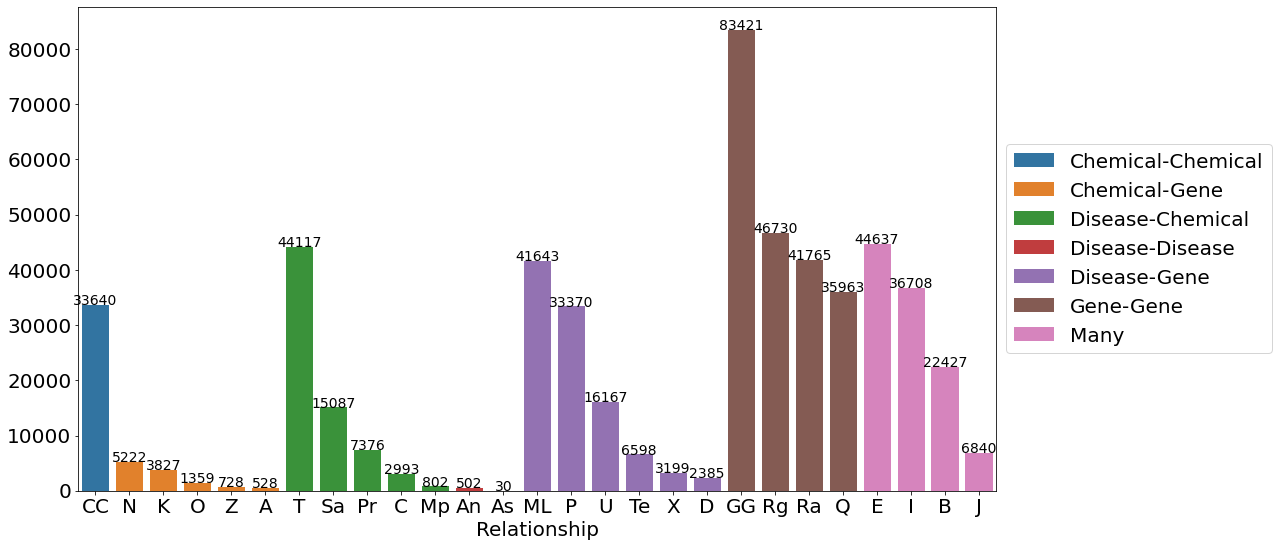

In [69]:
dd = ddf.groupby(2).apply(lambda x: x.sort_values(1, ascending = False)).reset_index(drop=True)
fig,ax = plt.subplots(figsize=(15,5))
fig.set_size_inches(16,8)
g = sns.barplot(x=0, y=1, hue=2, data=dd, ax=ax, dodge=False)
#Code for to put legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.xlabel('Relationship')
plt.ylabel('')
for index, row in dd.iterrows():
    g.text(row.name,row[1], row[1], color='black', ha="center", size=14)
plt.show()

In [70]:
fig.savefig('covdsplit.svg', format='svg', dpi=1200)

In [10]:
very_very_common = [] # 6000
very_common = [] # 10 000 - 40 000
common = [] # 1000 - 6000
rare = [] # 400 - 700
very_rare = [] # 24

In [11]:
for rel, count in dict(relation_count).items():
    if count > 60000:
        very_very_common.append(rel)
    elif count >= 10000 and count <=40000:
        very_common.append(rel)
    elif count >= 1000 and count <=6000:
        common.append(rel)
    elif count >= 400 and count <=700:
        rare.append(rel)
    else:
        very_rare.append(rel)

In [12]:
len(very_very_common), len(very_common), len(common), len(rare), len(very_rare)

(1, 12, 9, 4, 1)

In [13]:
!pwd

/Users/nina/Documents/UCL/Aladdin/biolink/COVID results analysis


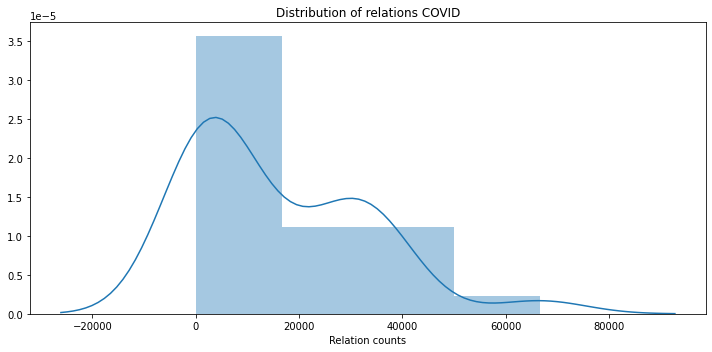

In [16]:
f = plt.figure(figsize=(10,5))
sns.distplot(relation_count.values)
plt.xlabel('Relation counts')
plt.title('Distribution of relations COVID')
plt.tight_layout()
plt.show()

In [17]:
f.savefig('relation_distrib_covid.jpg')

/Users/nina/opt/anaconda3/envs/libkge/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


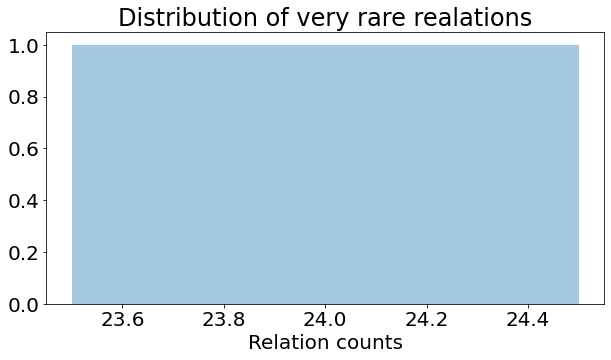

In [19]:
c = []
for r in very_rare:
    c.append(dict(relation_count)[r])
f = plt.figure(figsize=(10,5))
sns.distplot(c)
plt.xlabel('Relation counts')
plt.title('Distribution of very rare realations')
plt.show()

In [20]:
c = []
for r in rare:
    c.append(dict(relation_count)[r])

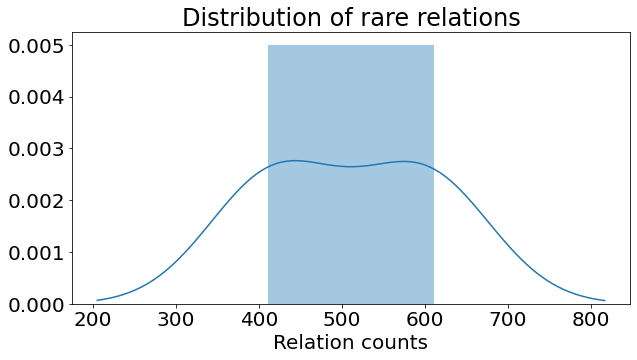

In [22]:
f = plt.figure(figsize=(10,5))
sns.distplot(c)
plt.xlabel('Relation counts')
plt.title('Distribution of rare relations')
plt.show()

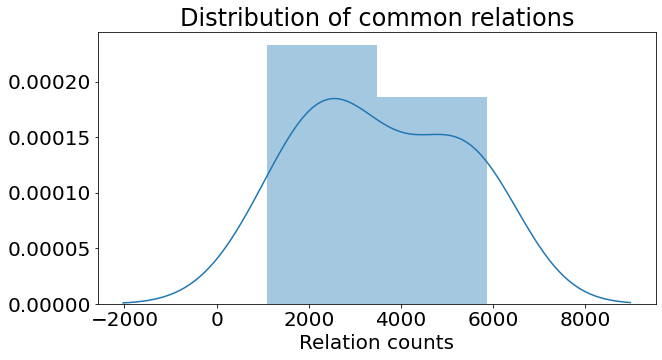

In [23]:
c = []
for r in common:
    c.append(dict(relation_count)[r])
f = plt.figure(figsize=(10,5))
sns.distplot(c)
plt.xlabel('Relation counts')
plt.title('Distribution of common relations')
plt.show()

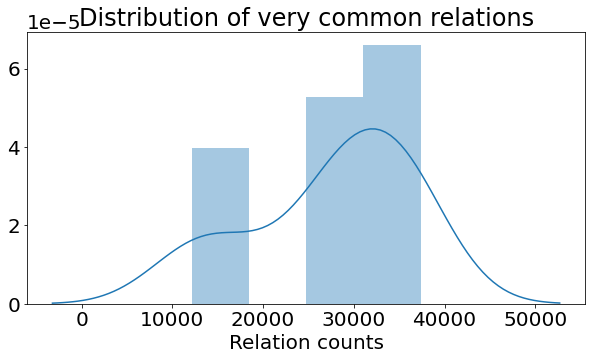

In [24]:
c = []
for r in very_common:
    c.append(dict(relation_count)[r])
f = plt.figure(figsize=(10,5))
sns.distplot(c)
plt.xlabel('Relation counts')
plt.title('Distribution of very common relations')
plt.show()

/Users/nina/opt/anaconda3/envs/libkge/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


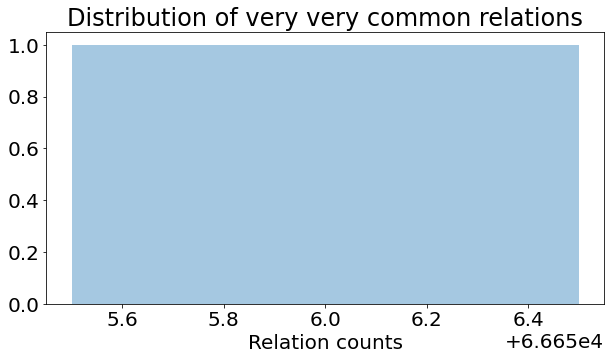

In [25]:
c = []
for r in very_very_common:
    c.append(dict(relation_count)[r])
f = plt.figure(figsize=(10,5))
sns.distplot(c)
plt.xlabel('Relation counts')
plt.title('Distribution of very very common relations')
plt.show()

In [26]:
def how_common(x):
    if x in very_very_common:
        return 'very very common'
    elif x in very_common:
        return 'very common'
    elif x in common:
        return 'common'
    elif x in very_rare:
        return 'very rare'
    else:
        return 'rare'

## Relation analysis

In [9]:
ce_tuck = pd.read_csv(ce_tuck_path)
bce_tuck = pd.read_csv(bce_tuck_path)
bce_cp = pd.read_csv(bce_cp_path)
ce_cp = pd.read_csv(ce_cp_path)
amie_res_rel = pd.read_csv(amie_path, sep='\t', header=None)
with open(cbr_path, 'r') as f:
    cbr = json.load(f)

In [10]:
pretrained = pd.read_csv(pretrained_path)
pretrained.head()

,Relation,MRR,h@1,h@3,h@10
0,8,0.125107,0.068394,0.129543,0.236002
1,1,0.093466,0.050355,0.093609,0.170755
2,7,0.239353,0.155192,0.265931,0.404300
3,3,0.059806,0.023286,0.051100,0.119017
4,9,0.429820,0.312987,0.496954,0.647661


In [72]:
ph_tuck = pd.read_csv(ph_tu_path)
pw_tuck = pd.read_csv(pw_tu_path)
pw_cp = pd.read_csv(pw_cp_path)
ph_cp = pd.read_csv(ph_cp_path)

In [13]:
amie_res_rel[0] = amie_res_rel[0].apply(lambda x: d.rel_mappings[x])
amie_res_rel.drop(columns=[1,2,3,4,5,6], inplace=True)
amie_res_rel.columns = ['Relation', 'h@10', 'h@1', 'MRR']
amie_res_rel['h@10'] = amie_res_rel['h@10'].apply(lambda x: x/100)

In [14]:
cbr = pd.DataFrame(cbr).T.reset_index()
cbr.rename(columns={'index': 'Relation'}, inplace=True)
cbr['Relation'] = cbr['Relation'].apply(lambda x: d.rel_mappings[x])

In [15]:
cbr.rename(columns={'hits_10': 'h@10', 'mrr': 'MRR'}, inplace=True)

In [16]:
def set_occurrence(df):
    df['rel_occurrence'] =  df['Relation'].apply(lambda x: relation_count[x])
set_occurrence(bce_cp)
set_occurrence(ce_cp)
set_occurrence(ce_tuck)
set_occurrence(bce_tuck)
set_occurrence(cbr)
set_occurrence(amie_res_rel)

In [17]:
set_occurrence(pretrained)

In [75]:
set_occurrence(ph_tuck)
set_occurrence(pw_tuck)
set_occurrence(pw_cp)


In [73]:
set_occurrence(ph_cp)

In [34]:
ce_cp['relation label'] = ce_cp['Relation'].apply(lambda x: how_common(x))
ce_tuck['relation label'] = ce_tuck['Relation'].apply(lambda x: how_common(x))
bce_tuck['relation label'] = bce_tuck['Relation'].apply(lambda x: how_common(x))
bce_cp['relation label'] = bce_cp['Relation'].apply(lambda x: how_common(x))
cbr['relation label'] = cbr['Relation'].apply(lambda x: how_common(x))
amie_res_rel['relation label'] = amie_res_rel['Relation'].apply(lambda x: how_common(x))

In [96]:
pretrained['relation label'] = pretrained['Relation'].apply(lambda x: how_common(x))

In [35]:
def weighted_av(x, mrr):
    if mrr:
        return (x['rel_occurrence'] * x['MRR']).sum()/x['rel_occurrence'].sum()
    else:
        return (x['rel_occurrence'] * x['h@10']).sum()/x['rel_occurrence'].sum()

## Putting it all together

In [36]:
def plot_relation_common(dfs, labels, groupby_l = 'relation label', save=None, mean=False, mrr=False, neg_sampl=False):
    
    if neg_sampl:
        palette = {'CE Complex': 'blue',
                  'BCE Complex': 'royalblue',
                  'PH Complex': 'skyblue',
                   'PW-Log Complex': 'dodgerblue',
                  'CE Tucker': 'indianred',
                  'BCE Tucker': 'salmon', 
                  'PW-Log Tucker': 'sandybrown',
                  'PH Tucker': 'peru', 
                  'AMIE': 'mediumpurple',
                  'CBR': 'plum'}
    else:
        palette = {'CE Complex': 'blue',
                  'BCE Complex': 'royalblue',
                  'CE Tucker': 'indianred',
                  'BCE Tucker': 'salmon', 
                  'AMIE': 'mediumpurple',
                  'CBR': 'plum'}
    concat = []
    if mrr:
        get = 'MRR'
    else:
        get = 'h@10'
    print('get', get)
    for i,df in enumerate(dfs):
        
#         if mean:
#             d = df.groupby(groupby_l)[[get, 'rel_occurrence']].apply(lambda x: weighted_av(x, mrr)).reset_index(name=get)
# #             d = df.groupby(groupby_l)['h@10'].mean().reset_index()
#         else:
#             d = df.groupby(groupby_l)[get].sum().reset_index()
        if len(labels) > 0:
            df['label'] = labels[i]
        concat.append(df)
    
    conc = pd.concat(concat)
#     print(conc.columns)
    f = plt.figure(figsize=(22,9))
    sns.barplot(x='relation label', y=get, hue = 'label', data=conc, order=['very rare', 'rare', 'common', 'very common', 'very very common'],\
                palette= palette, ci='sd')
    plt.xticks(rotation=15)
    if mean:
        what = 'Mean'
    else:
        what = 'Sum'
    plt.ylabel(what + ' ' + get + ' per relation')
    plt.xlabel('Frequency of relaiton')
    if mrr:
        plt.title('MRR model comparison performance per relation')
    else:
        plt.title('H@10 model comparison performance per relation')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.show()
    if save is not None:
        plt.tight_layout()
        f.savefig(save + '_mean_' + what + '_' + str(mean) + '.svg', format='svg', dpi=1200)

<AxesSubplot:xlabel='relation label', ylabel='h@10'>

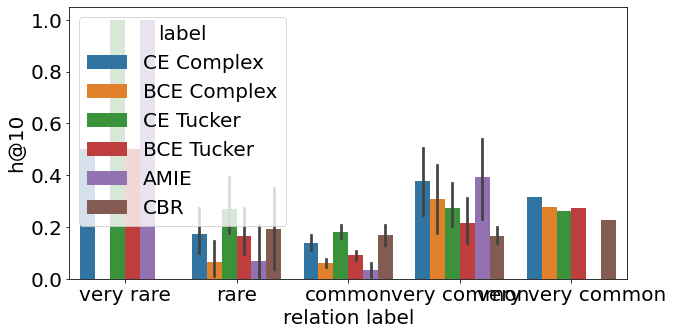

In [37]:
ls = ['CE Complex', 'BCE Complex', 'CE Tucker', 'BCE Tucker', 'AMIE', 'CBR']
c = []
for i, o in enumerate([ce_cp, bce_cp, ce_tuck, bce_tuck, amie_res_rel, cbr]):
    o['label'] = ls[i]
    c.append(o)
testing = pd.concat(c)
plt.figure(figsize=(10,5))
sns.barplot(x='relation label', y='h@10', hue='label', data=testing, order=['very rare', 'rare', 'common', 'very common', 'very very common'])

get h@10


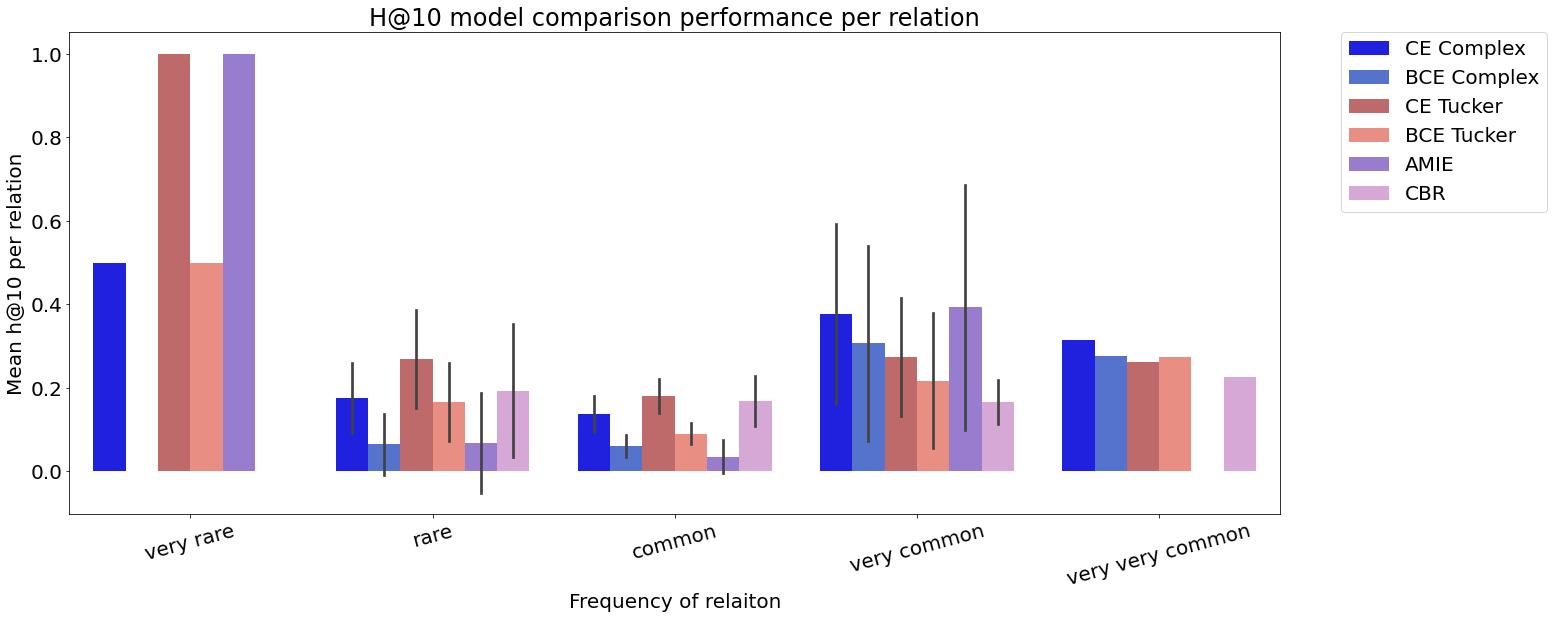

<Figure size 432x288 with 0 Axes>

In [38]:
plot_relation_common([ce_cp, bce_cp, ce_tuck, bce_tuck, amie_res_rel, cbr], ['CE Complex', 'BCE Complex', 'CE Tucker', 'BCE Tucker', 'AMIE', 'CBR'], mean=True, save='pse_rel_bar')

get MRR
Index(['relation label', 'MRR', 'label'], dtype='object')


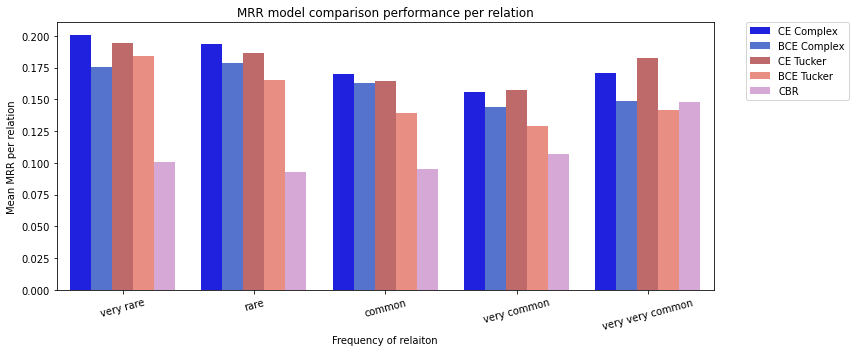

<Figure size 432x288 with 0 Axes>

In [161]:
plot_relation_common([ce_cp, bce_cp, ce_tuck, bce_tuck, cbr], ['CE Complex', 'BCE Complex', 'CE Tucker', 'BCE Tucker', 'CBR'], mean=True, mrr = True, save='pse_rel_comparisons')

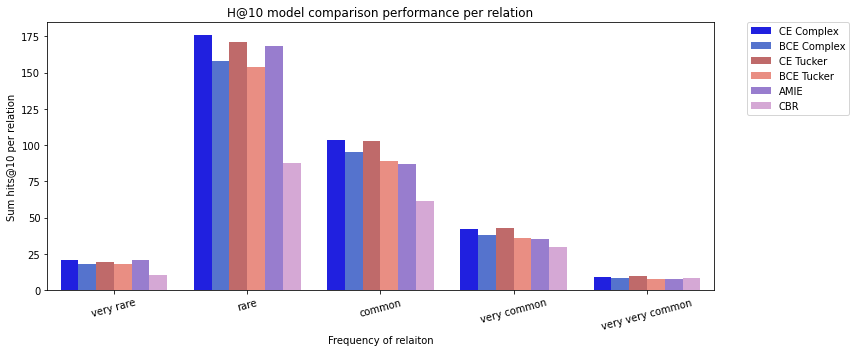

<Figure size 432x288 with 0 Axes>

In [80]:
plot_relation_common([ce_cp, bce_cp, ce_tuck, bce_tuck, amie_res_rel, cbr], ['CE Complex', 'BCE Complex', 'CE Tucker', 'BCE Tucker', 'AMIE', 'CBR'], save='pse_relation_comparisions')

In [87]:
b.head()

,Relation,MRR,h@1,h@3,h@10,rel_occurrence,relation label
654,654,0.123958,0.04,0.12,0.30,402,very rare
335,335,0.168956,0.08,0.15,0.38,404,very rare
744,744,0.263094,0.13,0.31,0.53,407,very rare
833,833,0.177617,0.08,0.16,0.40,407,very rare
330,330,0.417398,0.27,0.47,0.73,408,very rare


In [88]:
b.shape

(963, 7)

In [39]:
import numpy as np
b['idx'] = np.arange(27)

NameError: name 'b' is not defined

<AxesSubplot:xlabel='idx', ylabel='MRR'>

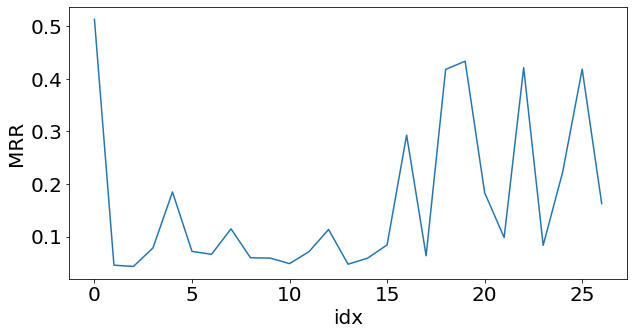

In [43]:
b = ce_cp.sort_values(by = 'rel_occurrence', axis=0)
plt.figure(figsize=(10,5))
b['idx'] = np.arange(27)
sns.lineplot(x='idx', y='MRR', data=b)

<AxesSubplot:xlabel='idx', ylabel='h@10'>

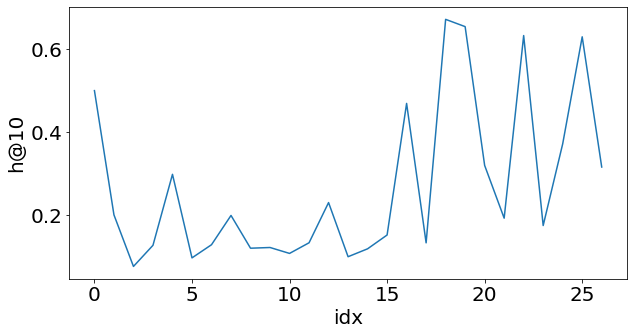

In [42]:
b = ce_cp.sort_values(by = 'rel_occurrence', axis=0)
plt.figure(figsize=(10,5))
b['idx'] = np.arange(27)
sns.lineplot(x='idx', y='h@10', data=b)

<AxesSubplot:xlabel='idx', ylabel='h@10'>

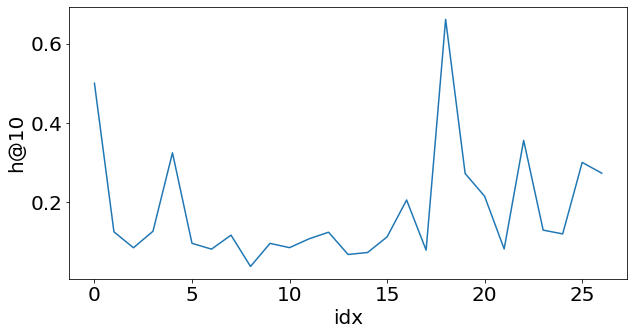

In [45]:
b = bce_tuck.sort_values(by = 'rel_occurrence', axis=0)
plt.figure(figsize=(10,5))

b['idx'] = np.arange(27)
sns.lineplot(x='idx', y='h@10', data=b)

<AxesSubplot:xlabel='rel_name', ylabel='h@10'>

<Figure size 720x360 with 0 Axes>

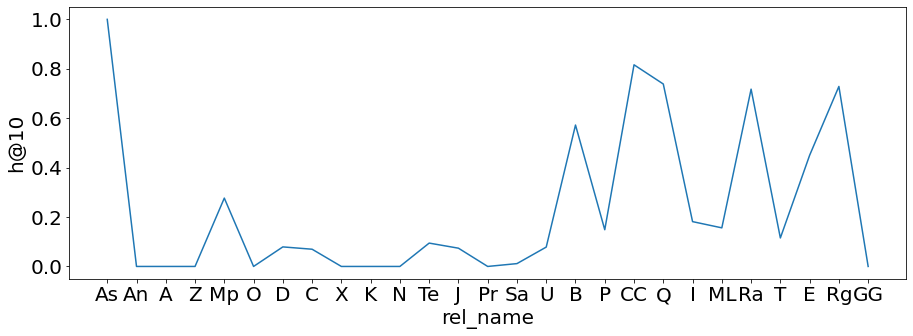

In [59]:
b = amie_res_rel.sort_values(by = 'rel_occurrence', axis=0)
plt.figure(figsize=(10,5))

plt.figure(figsize=(15,5))
b['idx'] = np.arange(27)
b['rel_name'] = b['Relation'].apply(lambda x: d.rel_mappings.inverse[x])
plt.tight_layout()
sns.lineplot(x='rel_name', y='h@10', data=b, sort=False)

<AxesSubplot:xlabel='rel_name', ylabel='h@10'>

<Figure size 720x360 with 0 Axes>

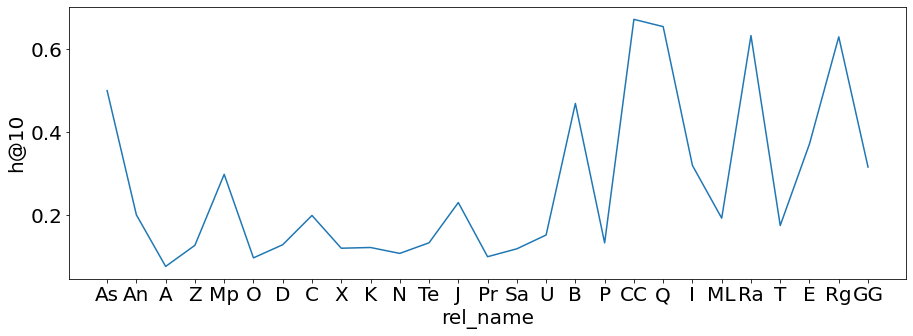

In [58]:
b = ce_cp.sort_values(by = 'rel_occurrence', axis=0)
plt.figure(figsize=(10,5))

plt.figure(figsize=(15,5))
b['idx'] = np.arange(27)
b['rel_name'] = b['Relation'].apply(lambda x: d.rel_mappings.inverse[x])
plt.tight_layout()
sns.lineplot(x='rel_name', y='h@10', data=b, sort=False)

<AxesSubplot:xlabel='rel_name', ylabel='h@10'>

<Figure size 720x360 with 0 Axes>

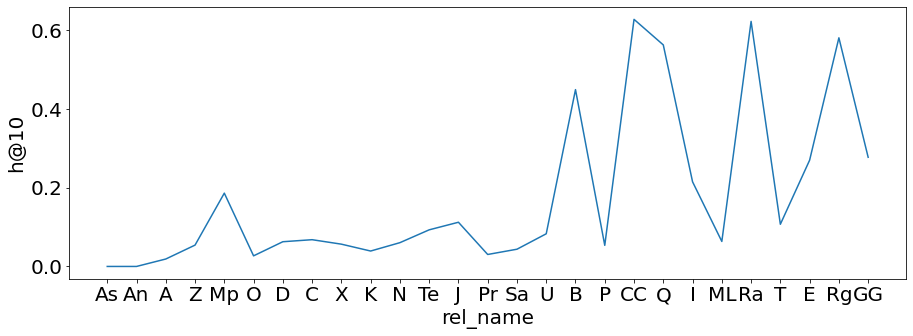

In [62]:
b = bce_cp.sort_values(by = 'rel_occurrence', axis=0)
plt.figure(figsize=(10,5))

plt.figure(figsize=(15,5))
b['idx'] = np.arange(27)
b['rel_name'] = b['Relation'].apply(lambda x: d.rel_mappings.inverse[x])
plt.tight_layout()
sns.lineplot(x='rel_name', y='h@10', data=b, sort=False)

In [156]:
def plot_all_rels(dfs, labels, save=None):
    concat = [] 
    for i,df in enumerate(dfs):

    #         if mean:
    #             d = df.groupby(groupby_l)[[get, 'rel_occurrence']].apply(lambda x: weighted_av(x, mrr)).reset_index(name=get)
    # #             d = df.groupby(groupby_l)['h@10'].mean().reset_index()
    #         else:
    #             d = df.groupby(groupby_l)[get].sum().reset_index()
        if len(labels) > 0:
            df = df.sort_values(by = 'rel_occurrence', axis=0)
            df['rel_name'] = df['Relation'].apply(lambda x: d.rel_mappings.inverse[x])
            df['label'] = labels[i]
        concat.append(df)

    conc = pd.concat(concat)
    
    f = plt.figure(figsize=(50,15))
    g = sns.FacetGrid(conc, row="label", aspect=4)
    g.map(sns.barplot, 'rel_name', 'h@10')
    plt.xlabel('Relation')
    plt.xticks(rotation=-15)
    plt.tight_layout()
    if save is not None:
        g.savefig(save + '.jpg')

In [250]:
def plot_all_rels(dfs, labels, auc=False, rule_based=False, save=None, annotation=False):
    concat = [] 
    
    palette = {'CE Complex': 'blue',
                  'BCE Complex': 'royalblue',
                  'PH Complex': 'skyblue',
                   'PW-Log Complex': 'dodgerblue',
                  'CE Tucker': 'indianred',
                  'BCE Tucker': 'salmon', 
                  'PW-Log Tucker': 'sandybrown',
                  'PH Tucker': 'peru', 
                  'AMIE': 'mediumpurple',
                  'CBR': 'plum'}
    
    for i,df in enumerate(dfs):

    #         if mean:
    #             d = df.groupby(groupby_l)[[get, 'rel_occurrence']].apply(lambda x: weighted_av(x, mrr)).reset_index(name=get)
    # #             d = df.groupby(groupby_l)['h@10'].mean().reset_index()
    #         else:
    #             d = df.groupby(groupby_l)[get].sum().reset_index()
        if len(labels) > 0:
            df = df.sort_values(by = 'rel_occurrence', axis=0)
            df['rel_name'] = df['Relation'].apply(lambda x: d.rel_mappings.inverse[x])
            if rule_based:
                df['label'] = labels[i]
            else:
                loss, mod = labels[i].split(' ')
                df['label_model'] = mod
                df['label_loss'] = loss
            df['color'] = labels[i]
        concat.append(df)

    conc = pd.concat(concat)
    
    f = plt.figure(figsize=(50,20))
    if rule_based:
        g = sns.FacetGrid(conc, row="label", aspect=3, height=5, hue='color', palette=palette)
    else:

        g = sns.FacetGrid(conc, row="label_loss", col="label_model", margin_titles=True, aspect=7, height=2, hue='color', palette=palette)
    
    if auc:
        g.map(sns.barplot, 'rel_name', 'apr')
        g.set(ylim=(0.8, None))
        g.set(ylabel='AUC-PR')
    else:
        g.map(sns.barplot, 'rel_name', 'h@10')
#     g.set(xlabel='Relation')
    g.set_xticklabels(rotation=40, horizontalalignment='right', fontweight='light',)
    
    if not rule_based:
        axes = g.axes.flatten()
        axes[0].set_title("Complex")
        axes[-1].set_xlabel("Relation")
        axes[1].set_title("Tucker")
        axes[-2].set_xlabel("Relation")
        
    

        for ax in axes:
            # Make right ylabel more human-readable and larger
        # Only the 2nd and 4th axes have something in ax.texts
            if ax.texts:
                # This contains the right ylabel text
                txt = ax.texts[0]
#                 print(ax.texts)
                ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                        txt.get_text().split('=')[1],
                        transform=ax.transAxes,
                        va='center',)
                # Remove the original text
                ax.texts[0].remove()
    else:
        axes = g.axes.flatten()
        axes[0].set_title("AMIE")
        axes[1].set_title("CBR")
    if annotation:
        for ax in g.axes.flatten():
            for p in ax.patches:
                     ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height() + 0.05),
                         ha='center', va='center', fontsize=17, color='black', xytext=(0, 5),
                         textcoords='offset points', rotation=20)

    plt.xlabel('Relation')
#     plt.xticks(rotation=-15)
    plt.tight_layout()
    if save is not None:
        g.savefig(save + '.svg', format='svg', dpi=1200)

In [21]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('font', size=20)

<Figure size 3600x1440 with 0 Axes>

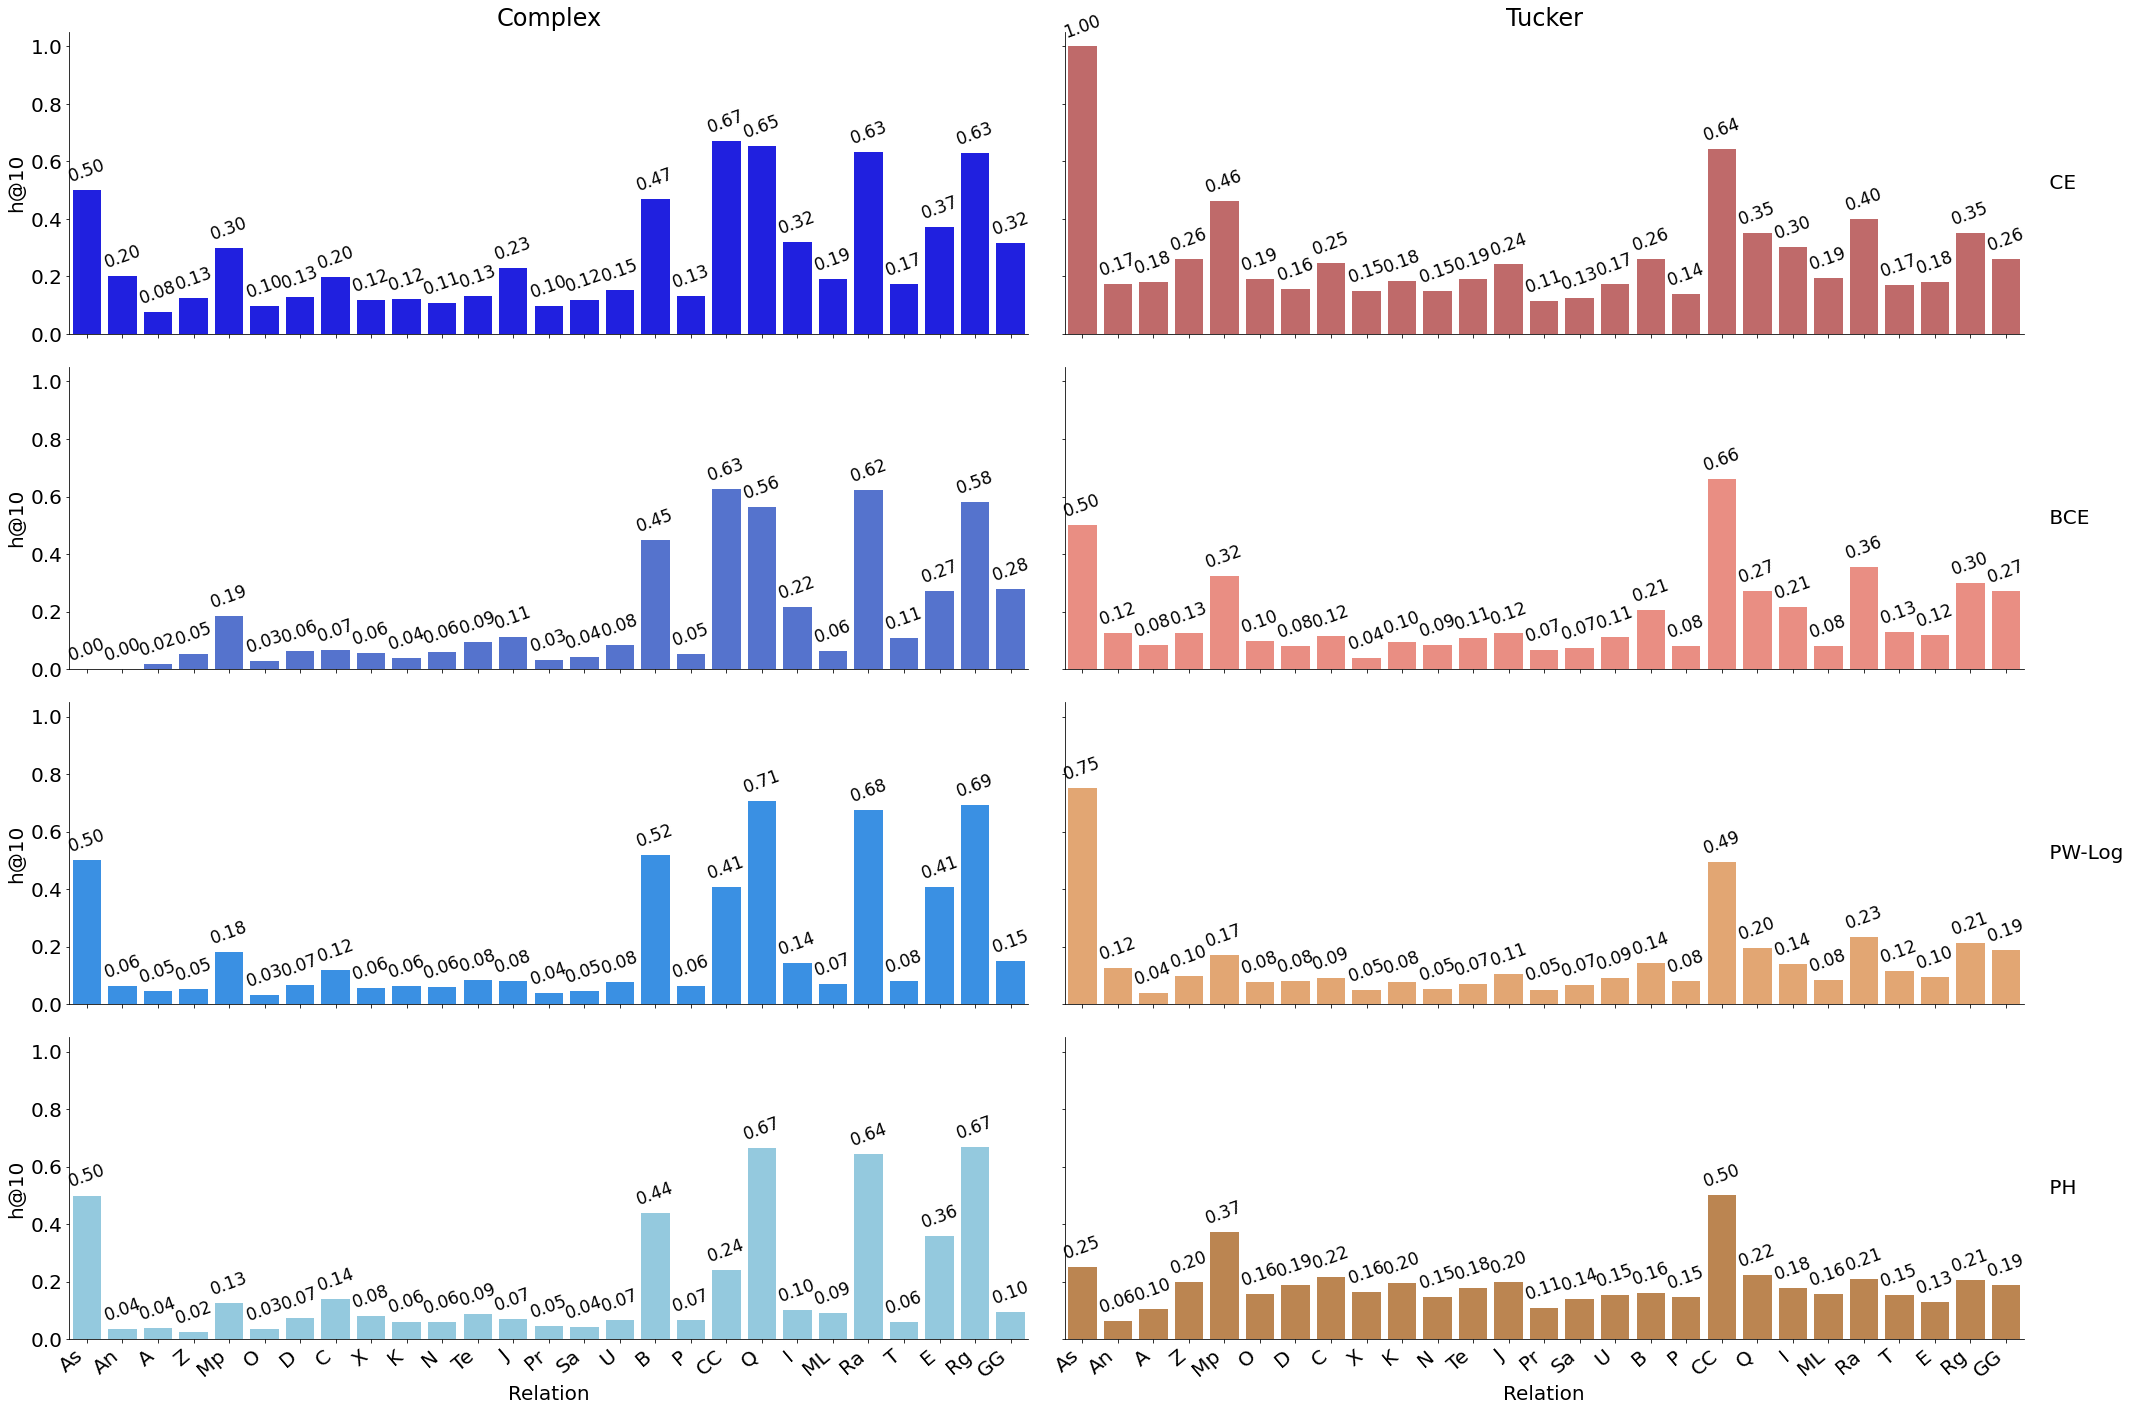

In [122]:
dfs = [ce_cp, bce_cp, pw_cp, ph_cp, ce_tuck, bce_tuck, pw_tuck, ph_tuck]
labels = [ 'CE Complex', 'BCE Complex', 'PW-Log Complex', 'PH Complex', 'CE Tucker', 'BCE Tucker', \
          'PW-Log Tucker', 'PH Tucker']
plot_all_rels(dfs, labels, annotation=True)

<Figure size 3600x1440 with 0 Axes>

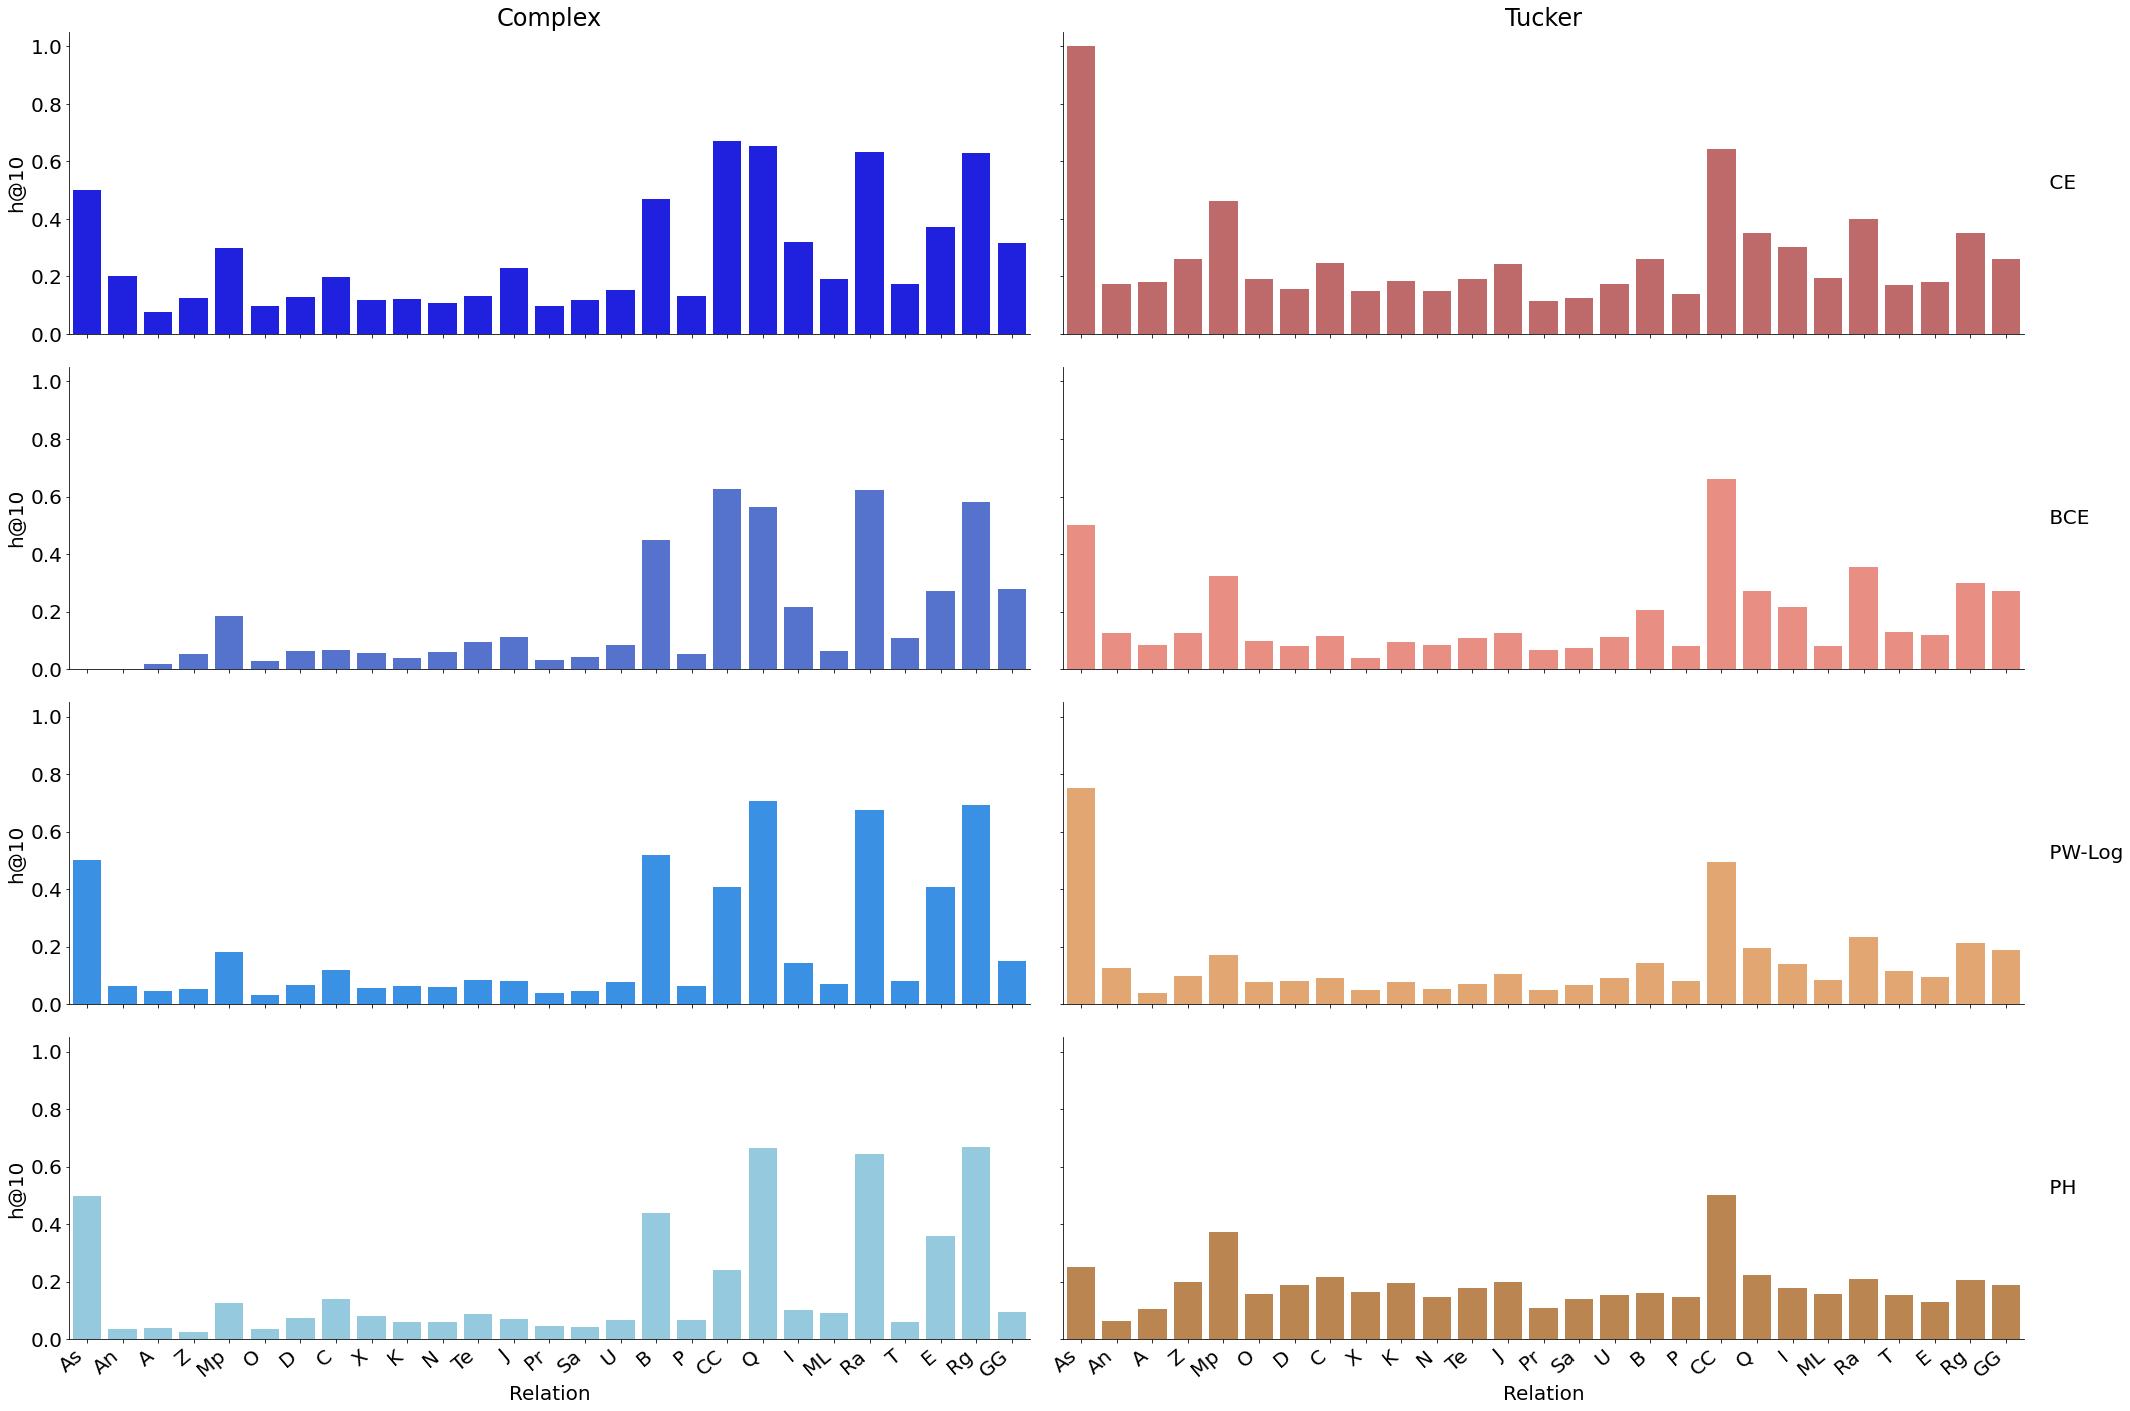

In [93]:
dfs = [ce_cp, bce_cp, pw_cp, ph_cp, ce_tuck, bce_tuck, pw_tuck, ph_tuck]
labels = [ 'CE Complex', 'BCE Complex', 'PW-Log Complex', 'PH Complex', 'CE Tucker', 'BCE Tucker', \
          'PW-Log Tucker', 'PH Tucker']
plot_all_rels(dfs, labels, save='covid_rels')

<Figure size 3600x1440 with 0 Axes>

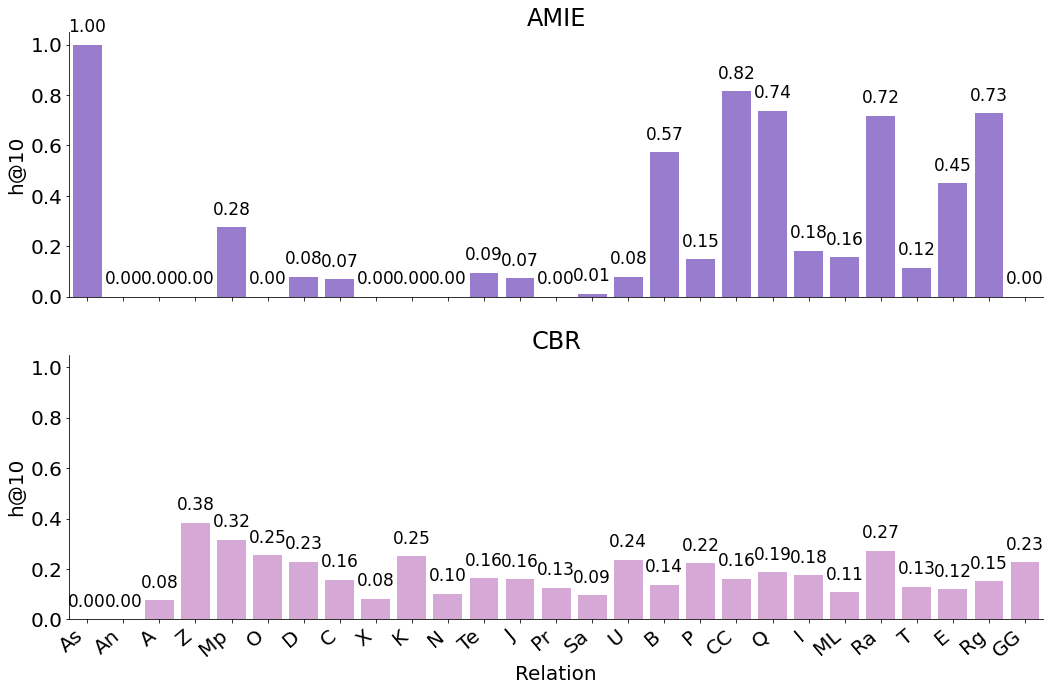

In [118]:
dfs = [amie_res_rel, cbr]
labels = [ 'AMIE', 'CBR']
plot_all_rels(dfs, labels, rule_based=True)

----
## AUC PATHS

In [198]:
ce_cp_auc_path = 'AUC_CPLEX_COVID_HARDER.log'
# bce_cp_auc_path = 'BCE_CP_NEWENTS.log'
# ce_t_auc_path = 'CE_T_NEWENTS.log'
# bce_t_auc_path = 'NEW_ENTS_ANAL.log'
ph_cp_path_auc = 'ph_tuck_COPMLEX_RES_2.out'
pw_cp_path_auc = 'pw_cplex_COVID_RES.out'
ph_tu_path_auc = 'ph_tuck_COVID_AUCSINGLE.out'
pw_tu_path_auc = 'pw_tuck_COVID_RES.out' 

In [199]:
def get_auc(path):
    with open(path, 'r') as f:
        res = []
        prev_5 = False
        prev_10 = False
        for l in f.readlines():
            if 'AUC FIVE' in l:
                prev_5 = True
                continue
            elif 'AUC TEN' in l:
                prev_10 = True
                prev_5 = False
                continue
            elif 'AP:' in l:
                if prev_5:
                    prev_5 = False
                    continue
                elif prev_10:
                    prev_10 = False
                    continue
                else:
                    l = l.split()
                  
                    ap = float(l[1])
                    auc = float(l[4])
                    apr = float(l[7])
                    p50 = float(l[10])
                    rel = int(l[12])
                    res.append([rel, ap, auc, apr, p50])
            else:
                prev_5 = False
                prev_10 = False
    
    res = pd.DataFrame(res)
    res.rename(columns={0: 'rel', 1: 'ap', 2: 'auc', 3:'apr', 4: 'p50'}, inplace=True)    
    return res

In [211]:
def get_auc_10(path):
    with open(path, 'r') as f:
        res = []
        prev_5 = False
        prev_10 = False
        for l in f.readlines():
            if 'AUC TEN' in l:
                prev_10 = True
                continue
            if prev_10:
                l = l.split()
                  
                ap = float(l[1])
                auc = float(l[4])
                apr = float(l[7])
                p50 = float(l[10])
                rel = int(l[12])
                res.append([rel, ap, auc, apr, p50])
                prev_10 = False
                continue
            else:
                prev_10 = False
           
    res = pd.DataFrame(res)
    res.rename(columns={0: 'Relation', 1: 'ap', 2: 'auc', 3:'apr', 4: 'p50'}, inplace=True)    
    return res

In [201]:
auc_ce_cp = get_auc(ce_cp_auc_path)
# auc_bce_cp = get_auc(bce_cp_auc_path)
# auc_ce_t = get_auc(ce_t_auc_path)
# auc_bce_t = get_auc(bce_t_auc_path)
auc_ph_cp = get_auc(ph_cp_path_auc)
auc_pw_cp = get_auc(pw_cp_path_auc)
auc_ph_t = get_auc(ph_tu_path_auc)
auc_pw_t = get_auc(pw_tu_path_auc)

In [202]:
auc_ce_cp['auc'].mean(), auc_ce_cp['apr'].mean(), auc_ce_cp['ap'].mean(), auc_ce_cp['p50'].mean()

(0.996062962962963, 0.9968148148148147, 1.0, 1.0)

In [157]:
auc_ph_cp['auc'].mean(), auc_ph_cp['apr'].mean(), auc_ph_cp['ap'].mean(), auc_ph_cp['p50'].mean()

(0.9931629629629628, 0.9943555555555555, 1.0, 1.0)

In [188]:
auc_pw_cp['auc'].mean(), auc_pw_cp['apr'].mean(), auc_pw_cp['ap'].mean(), auc_pw_cp['p50'].mean()

(0.9894925925925926, 0.9921333333333332, 1.0, 1.0)

In [172]:
auc_ph_t['auc'].mean(), auc_ph_t['apr'].mean(), auc_ph_t['ap'].mean(), auc_ph_t['p50'].mean()

(0.9958148148148148,
 0.9959666666666669,
 0.9959666666666669,
 0.9851851851851853)

In [194]:
auc_pw_t['auc'].mean(), auc_pw_t['apr'].mean(), auc_pw_t['ap'].mean(), auc_pw_t['p50'].mean()

(0.9947888888888891,
 0.9939185185185186,
 0.9939185185185186,
 0.9785185185185186)

In [206]:
ce_cp_auc_path_10 = 'AUC_CPLEX_COVID_HARDER.log'
bce_cp_auc_path_10 = 'bce_complex_covid_AUC.out'
ce_t_auc_path_10 = 'ce_tuck_covid_AUC.out'
bce_t_auc_path_10 = 'bce_tuck_covid_AUC.out'
ph_cp_path_auc_10 = 'ph_tuck_COPMLEX_RES.out'
pw_cp_path_auc_10 = 'pw_cplex_COVID_RES.out'
ph_tu_path_auc_10 = 'ph_tuck_COVID_RES.out'
pw_tu_path_auc_10 = 'pw_tuck_COVID_RES.out' 

In [212]:
auc_ce_cp_10 = get_auc_10(ce_cp_auc_path_10)
auc_bce_cp_10 = get_auc_10(bce_cp_auc_path)
auc_ce_t_10 = get_auc_10(ce_t_auc_path)
auc_bce_t_10 = get_auc_10(bce_t_auc_path)
auc_ph_cp_10 = get_auc_10(ph_cp_path_auc_10)
auc_pw_cp_10 = get_auc_10(pw_cp_path_auc_10)
auc_ph_t_10 = get_auc_10(ph_tu_path_auc_10)
auc_pw_t_10 = get_auc_10(pw_tu_path_auc_10)

In [205]:
auc_ce_cp_10['auc'].mean(), auc_ce_cp_10['apr'].mean(), auc_ce_cp_10['ap'].mean(), auc_ce_cp_10['p50'].mean()

(0.9959962962962962, 0.9827444444444445, 1.0, 1.0)

In [168]:
auc_ph_cp_10['auc'].mean(), auc_ph_cp_10['apr'].mean(), auc_ph_cp_10['ap'].mean(), auc_ph_cp_10['p50'].mean()

(0.9931111111111112, 0.9712407407407407, 1.0, 1.0)

In [191]:
auc_pw_cp_10['auc'].mean(), auc_pw_cp_10['apr'].mean(), auc_pw_cp_10['ap'].mean(), auc_pw_cp_10['p50'].mean()

(0.9893703703703705, 0.9673222222222223, 1.0, 1.0)

In [183]:
auc_ph_t_10['auc'].mean(), auc_ph_t_10['apr'].mean(), auc_ph_t_10['ap'].mean(), auc_ph_t_10['p50'].mean()

(0.9958, 0.9727444444444444, 0.9727444444444444, 0.9822222222222223)

In [197]:
auc_pw_t_10['auc'].mean(), auc_pw_t_10['apr'].mean(), auc_pw_t_10['ap'].mean(), auc_pw_t_10['p50'].mean()

(0.9947, 0.9543259259259259, 0.9543259259259259, 0.9207407407407407)

## AUC graphs
The idea is to obtain similar per relationship graphs as done for the MRR, but for AUC-PR (since appears to be the hardest metric, on 1:10)


In [217]:
set_occurrence(auc_ce_cp_10)
set_occurrence(auc_bce_cp_10)
set_occurrence(auc_ce_t_10)
set_occurrence(auc_bce_t_10)
set_occurrence(auc_ph_cp_10)
set_occurrence(auc_pw_cp_10)
set_occurrence(auc_ph_t_10)
set_occurrence(auc_pw_t_10)

In [230]:
dfs = [auc_ce_cp_10, auc_bce_cp_10, auc_pw_cp_10, auc_ph_cp_10, auc_ce_t_10, auc_bce_t_10, auc_pw_t_10, auc_ph_t_10]
labels = [ 'CE Complex', 'BCE Complex', 'PW-Log Complex', 'PH Complex', 'CE Tucker', 'BCE Tucker',
          'PW-Log Tucker', 'PH Tucker']

<Figure size 3600x1440 with 0 Axes>

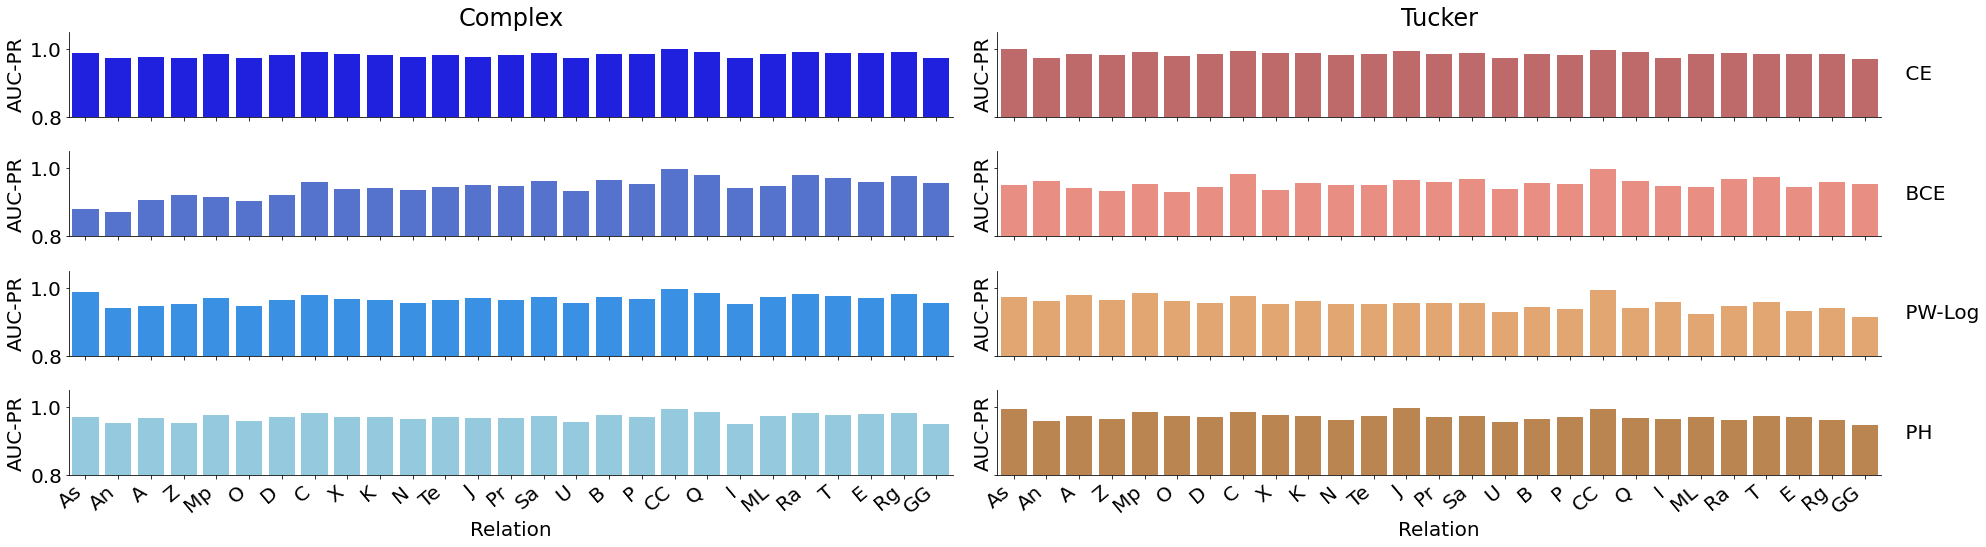

In [252]:
plot_all_rels(dfs, labels, auc=True, save='AUCPR_COVID')

In [114]:
d.ent_mappings['covid_19']

2143

In [150]:
testdf = pd.DataFrame(d.data['train'])
testdf.head()

,0,1,2
0,0,0,1
1,2,1,3
2,4,2,5
3,6,3,7
4,8,1,9


In [152]:
covd = testdf[testdf[2] == 2143]
covd[covd[1] == 5].shape

(8, 3)

In [153]:
T_covid = covd[covd[1] == 5]
for dis in T_covid[0].values:
    print(d.ent_mappings.inverse[dis])



membrane_oxygenation
mesenchymal_stem_cells
chloroquine
ganciclovir
daptomycin
oxygen_therapy
oseltamivir
lopinavir_ritonavir


In [148]:
d.ent_mappings['emtricitabine']

8400

In [121]:
d.ent_mappings.inverse[2629]

'ventilation'

In [122]:
d.ent_mappings.inverse[4625]

'plat'

In [124]:
d.ent_mappings.inverse[12987]

'remdesivir'

In [138]:
C_covid = covd[covd[1] == 21]
for dis in C_covid[0].values:
    print(d.ent_mappings.inverse[dis])


ventilation


In [139]:
d.ent_mappings['lopinavir']

6111

In [136]:
j_covid = covd[covd[1] == 16]
for dis in j_covid[0].values:
    print(d.ent_mappings.inverse[dis])

lta
il17f
e2
plp
gapdh
e3
tnmd
hmgb1
pdia6
cxcl13
serpina1
ugt1a1
enpep
mtb
ambp
si
atf6
mb
hhat
ccnd1


In [128]:
covd2 = testdf[testdf[0] == 2143]
covd2.head()

,0,1,2
2573,2143,12,9253
4367,2143,8,1973
4852,2143,8,242
5803,2143,12,10921
11534,2143,12,6009


In [47]:
d.rel_mappings

bidict({'GG': 0, 'U': 1, 'Te': 2, 'Pr': 3, 'Sa': 4, 'T': 5, 'B': 6, 'E': 7, 'ML': 8, 'Ra': 9, 'Rg': 10, 'P': 11, 'I': 12, 'Q': 13, 'CC': 14, 'D': 15, 'J': 16, 'X': 17, 'K': 18, 'N': 19, 'O': 20, 'C': 21, 'Z': 22, 'Mp': 23, 'A': 24, 'An': 25, 'As': 26})

## Neg sampling analysis

In [125]:
ph_tuck = pd.read_csv(ph_tu_path)
pw_tuck = pd.read_csv(pw_tu_path)
pw_cp = pd.read_csv(pw_cp_path)
ph_cp = pd.read_csv(ph_cp_path)

In [64]:
set_occurrence(ph_tuck)
set_occurrence(pw_tuck)
set_occurrence(pw_cp)
set_occurrence(ph_cp)

In [65]:
pw_cp['relation label'] = pw_cp['Relation'].apply(lambda x: how_common(x))
# pw_tuck['relation label'] = pw_tuck['Relation'].apply(lambda x: how_common(x))
# ph_tuck['relation label'] = ph_tuck['Relation'].apply(lambda x: how_common(x))
# ph_cp['relation label'] = ph_cp['Relation'].apply(lambda x: how_common(x))

<AxesSubplot:xlabel='rel_name', ylabel='h@10'>

<Figure size 720x360 with 0 Axes>

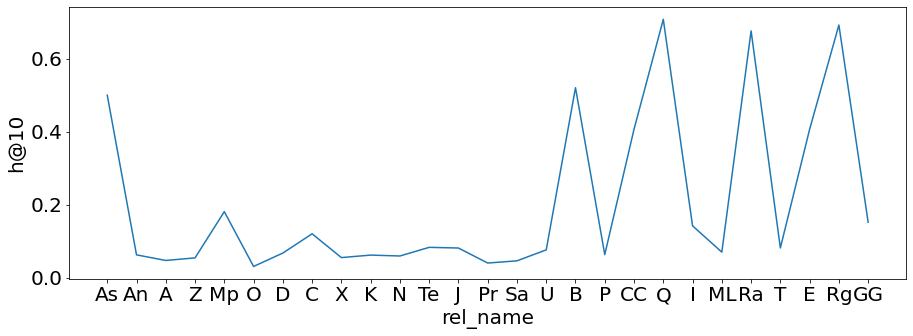

In [66]:
b = pw_cp.sort_values(by = 'rel_occurrence', axis=0)
plt.figure(figsize=(10,5))

plt.figure(figsize=(15,5))
b['idx'] = np.arange(27)
b['rel_name'] = b['Relation'].apply(lambda x: d.rel_mappings.inverse[x])
plt.tight_layout()
sns.lineplot(x='rel_name', y='h@10', data=b, sort=False)

get h@10


/Users/nina/opt/anaconda3/envs/libkge/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


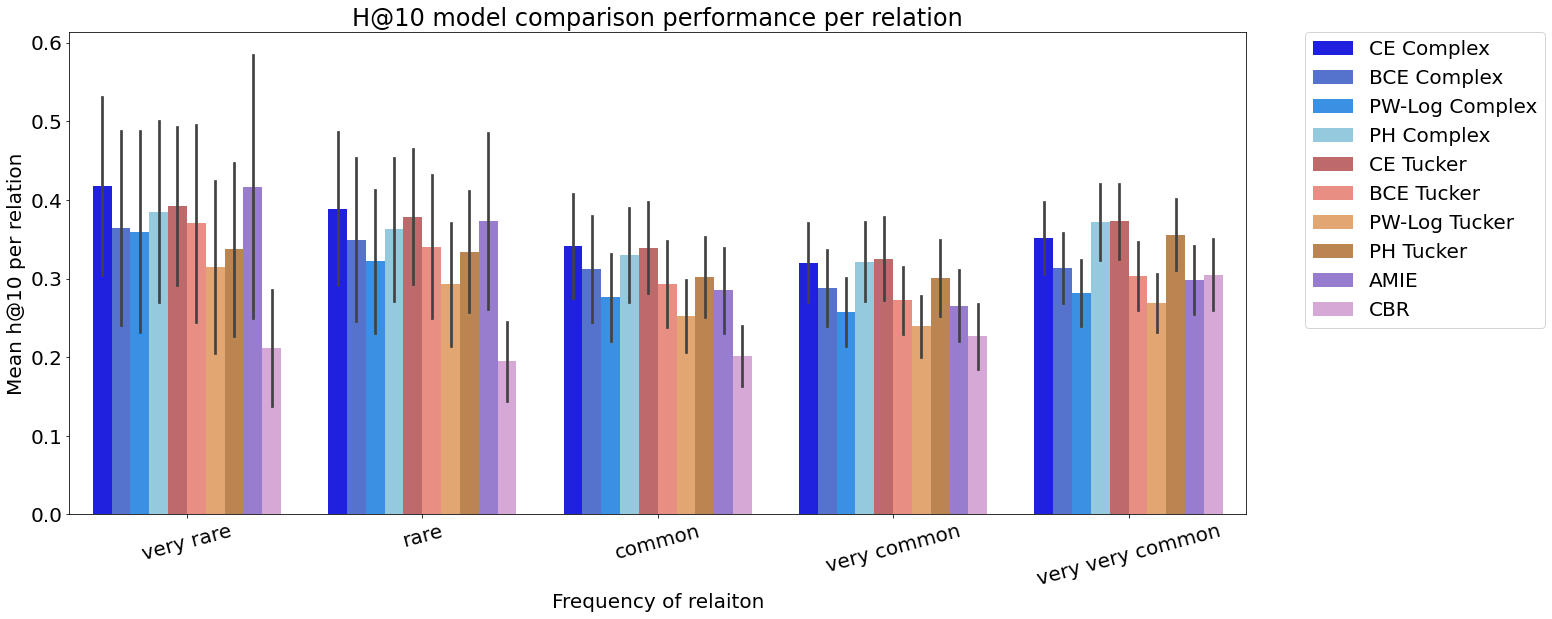

<Figure size 432x288 with 0 Axes>

In [238]:
plot_relation_common([ce_cp, bce_cp, pw_cp, ph_cp, ce_tuck, bce_tuck, pw_tuck, ph_tuck, amie_res_rel, cbr], \
                     ['CE Complex', 'BCE Complex', 'PW-Log Complex', 'PH Complex', \
                      'CE Tucker', 'BCE Tucker', 'PW-Log Tucker', 'PH Tucker', 'AMIE', 'CBR'], mean=True, neg_sampl=True, save='pse_rel_bar_ng')

In [285]:
all_things = [ce_cp, bce_cp, pw_cp, ph_cp, ce_tuck, bce_tuck, pw_tuck, ph_tuck, amie_res_rel, cbr]

In [327]:
res = []
for d in all_things:
    res.append(d.sort_values(by='h@10')[-10:]['Relation'].values.tolist()[::-1])

In [329]:
dr_res = []
for r in res:
    dr = []
    for rr in r:
        dr.append(relation_count[rr])
    dr_res.append(dr)
    

In [330]:
dr_res

[[1993, 408, 736, 409, 648, 529, 1848, 480, 1193, 977],
 [408, 1993, 648, 409, 736, 1848, 672, 654, 657, 1193],
 [408, 1993, 1848, 648, 736, 409, 480, 529, 977, 1193],
 [408, 1993, 736, 648, 529, 1848, 409, 1193, 977, 672],
 [408, 1993, 736, 648, 480, 977, 1242, 409, 1848, 542],
 [408, 1993, 736, 648, 409, 480, 1848, 977, 413, 643],
 [736, 1993, 409, 648, 408, 1848, 1193, 480, 542, 1242],
 [409, 1993, 408, 648, 731, 736, 1848, 1193, 848, 587],
 [674, 632, 687, 608, 414, 408, 409, 633, 407, 508],
 [440, 480, 432, 599, 15944, 19116, 15184, 6225, 20152, 17058]]

In [293]:
d

,Relation,hits_1,h@10,hits_3,hits_5,MRR,rel_occurrence,relation label,label
0,570,0.037217,0.237864,0.092233,0.132686,0.104524,9897,very common,CBR
1,2,0.070061,0.315740,0.154134,0.213919,0.153623,17128,very very common,CBR
2,715,0.038462,0.199301,0.090909,0.122378,0.099139,2290,rare,CBR
3,486,0.027027,0.195946,0.067568,0.094595,0.083849,1186,rare,CBR
4,747,0.051622,0.234513,0.106195,0.147493,0.116967,5426,common,CBR
...,...,...,...,...,...,...,...,...,...
958,696,0.065217,0.206522,0.090580,0.141304,0.115140,2211,rare,CBR
959,794,0.026316,0.201754,0.070175,0.149123,0.086940,919,rare,CBR
960,102,0.026230,0.206557,0.068852,0.113115,0.087532,4881,common,CBR
961,229,0.019608,0.098039,0.039216,0.078431,0.059526,417,very rare,CBR


In [321]:
for i, row in enumerate(res):
    res[i] = [d.rel_mappings.inverse[se] for se in row]
        

In [313]:
!ls /Users/nina/Downloads/PSEDATA

test.txt.gz  train.txt.gz valid.txt.gz


In [319]:
se_dict = {}
with open('/Users/nina/Documents/UCL/se_maps.txt') as f:
    for l in f.readlines():
        k,v = l.split('\t')
        se_dict['SE:' + k] = v.strip()

In [320]:
se_dict['SE:C0039504']

'tendon injury'

In [324]:
dr_res = []
for r in res:
    dr = []
    for rr in r:
        dr.append(se_dict[rr])
    dr_res.append(dr)
    

all_things = [ce_cp, bce_cp, pw_cp, ph_cp, ce_tuck, bce_tuck, pw_tuck, ph_tuck, amie_res_rel, cbr]

In [331]:
res

[[219, 330, 67, 954, 574, 956, 201, 244, 516, 554],
 [330, 219, 574, 954, 67, 201, 95, 206, 52, 516],
 [330, 219, 201, 574, 67, 954, 217, 956, 554, 516],
 [330, 219, 67, 574, 956, 201, 954, 516, 554, 95],
 [330, 219, 67, 574, 244, 554, 700, 954, 201, 861],
 [330, 219, 67, 574, 954, 244, 201, 554, 173, 213],
 [67, 219, 954, 574, 330, 201, 516, 244, 861, 700],
 [954, 219, 330, 574, 681, 67, 201, 516, 706, 510],
 [536, 81, 416, 733, 655, 330, 954, 440, 744, 419],
 [1, 244, 810, 267, 30, 680, 325, 475, 532, 73]]

In [325]:
dr_res

[['tendon injury',
  'coccydynia',
  'cervicitis',
  'carbuncle',
  'hair disease',
  'primary biliary cirrhosis',
  'abuse',
  'dyspareunia',
  'Vestibular disorder',
  'Nephrogenic diabetes insipidus'],
 ['coccydynia',
  'tendon injury',
  'hair disease',
  'carbuncle',
  'cervicitis',
  'abuse',
  'epidural abscess',
  'Arachnoiditis',
  'cervical dysplasia',
  'Vestibular disorder'],
 ['coccydynia',
  'tendon injury',
  'abuse',
  'hair disease',
  'cervicitis',
  'carbuncle',
  'Mumps',
  'primary biliary cirrhosis',
  'Nephrogenic diabetes insipidus',
  'Vestibular disorder'],
 ['coccydynia',
  'tendon injury',
  'cervicitis',
  'hair disease',
  'primary biliary cirrhosis',
  'abuse',
  'carbuncle',
  'Vestibular disorder',
  'Nephrogenic diabetes insipidus',
  'epidural abscess'],
 ['coccydynia',
  'tendon injury',
  'cervicitis',
  'hair disease',
  'dyspareunia',
  'Nephrogenic diabetes insipidus',
  'periodontitis',
  'carbuncle',
  'abuse',
  'Tooth Impacted'],
 ['coccydyni

In [326]:
res

[['SE:C0039504',
  'SE:C0009193',
  'SE:C0007860',
  'SE:C0007078',
  'SE:C0018500',
  'SE:C0008312',
  'SE:C0013146',
  'SE:C1384606',
  'SE:C0042594',
  'SE:C0162283'],
 ['SE:C0009193',
  'SE:C0039504',
  'SE:C0018500',
  'SE:C0007078',
  'SE:C0007860',
  'SE:C0013146',
  'SE:C0270629',
  'SE:C0003708',
  'SE:C0007868',
  'SE:C0042594'],
 ['SE:C0009193',
  'SE:C0039504',
  'SE:C0013146',
  'SE:C0018500',
  'SE:C0007860',
  'SE:C0007078',
  'SE:C0026780',
  'SE:C0008312',
  'SE:C0162283',
  'SE:C0042594'],
 ['SE:C0009193',
  'SE:C0039504',
  'SE:C0007860',
  'SE:C0018500',
  'SE:C0008312',
  'SE:C0013146',
  'SE:C0007078',
  'SE:C0042594',
  'SE:C0162283',
  'SE:C0270629'],
 ['SE:C0009193',
  'SE:C0039504',
  'SE:C0007860',
  'SE:C0018500',
  'SE:C1384606',
  'SE:C0162283',
  'SE:C0031099',
  'SE:C0007078',
  'SE:C0013146',
  'SE:C0040456'],
 ['SE:C0009193',
  'SE:C0039504',
  'SE:C0007860',
  'SE:C0018500',
  'SE:C0007078',
  'SE:C1384606',
  'SE:C0013146',
  'SE:C0162283',
  'SE:C00

In [284]:
pw_cp.sort_values(by='h@10')[-10:]

,Relation,MRR,h@1,h@3,h@10,rel_occurrence,relation label,label
516,516,0.379161,0.273649,0.422297,0.597973,1193,rare,PW-Log Complex
554,554,0.391873,0.285124,0.421488,0.599174,977,rare,PW-Log Complex
956,956,0.243799,0.100000,0.284615,0.600000,529,rare,PW-Log Complex
217,217,0.223152,0.083333,0.216667,0.616667,480,very rare,PW-Log Complex
954,954,0.408360,0.300000,0.440000,0.620000,409,very rare,PW-Log Complex
67,67,0.344449,0.236264,0.384615,0.620879,736,rare,PW-Log Complex
574,574,0.445726,0.333333,0.506173,0.623457,648,rare,PW-Log Complex
201,201,0.400675,0.285714,0.439394,0.662338,1848,rare,PW-Log Complex
219,219,0.545965,0.453815,0.586345,0.722892,1993,rare,PW-Log Complex
330,330,0.428087,0.280000,0.480000,0.750000,408,very rare,PW-Log Complex


In [283]:
ce_cp.sort_values(by='h@10')[-10:]

,Relation,MRR,h@1,h@3,h@10,rel_occurrence,relation label,label
554,554,0.424256,0.309917,0.483471,0.636364,977,rare,CE Complex
516,516,0.388789,0.273649,0.418919,0.638514,1193,rare,CE Complex
244,244,0.345797,0.194915,0.423729,0.644068,480,very rare,CE Complex
201,201,0.425597,0.305195,0.482684,0.658009,1848,rare,CE Complex
956,956,0.445707,0.315385,0.515385,0.684615,529,rare,CE Complex
574,574,0.501516,0.395062,0.555556,0.709877,648,rare,CE Complex
954,954,0.437865,0.280000,0.550000,0.710000,409,very rare,CE Complex
67,67,0.468792,0.346154,0.543956,0.714286,736,rare,CE Complex
330,330,0.417398,0.270000,0.470000,0.730000,408,very rare,CE Complex
219,219,0.616406,0.538153,0.646586,0.757028,1993,rare,CE Complex


## Entities analysis

In [126]:
def get_entities_info(path):
    v_rare_head = False
    v_rare_tail = False
    rare_h = False
    rare_t = False
    common_h = False
    common_t = False
    vcommon_h = False
    vcommon_t = False
    vvcommon_h = False
    vvcommon_t = False
    with open(path, 'r') as f:
        cplex_cp_ents = []
        for l in f.readlines():
            res = []

            if 'VERYRARE HEAD' in l:
                if not v_rare_head:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very rare head')
                    v_rare_head = True
                else:
                    continue
            elif 'VERYRARE TAIL' in l:
                if not v_rare_tail:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very rare tail')
                    v_rare_tail = True
                else:
                    continue
            elif 'VERYVERY-COMMON HEAD' in l:
                if not vvcommon_h:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very very common head')
                    vvcommon_h = True
                else:
                    continue
            elif 'VERYVERY-COMMON TAIL' in l:
                if not vvcommon_t:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very very common tail')
                    vvcommon_t = True
                else:
                    continue
            elif 'VERY-COMMON HEAD' in l:
                if not vcommon_h:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very common head')
                    vcommon_h = True
                else:
                    continue
            elif 'VERY-COMMON TAIL' in l:
                if not vcommon_t:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('very common tail')
                    vcommon_t = True
                else:
                    continue
            elif 'COMMON- HEAD' in l:
                if not common_h:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('common head')
                    common_h = True
                else:
                    continue
            elif 'COMMON- TAIL' in l:
                if not common_t:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('common tail')
                    common_t = True
                else:
                    continue
            elif 'RARE HEAD' in l:
                if not rare_h:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('rare head')
                    rare_h = True
                else:
                    continue
            elif 'RARE TAIL' in l:
                if not rare_t:
                    l = l.split()
                    mrr = l[5]
                    h1 = l[7]
                    h3 = l[9]
                    h10 = l[11]
                    res.append('rare tail')
                    rare_t = True
                else:
                    continue
            else:
                continue
            res += [float(mrr), float(h1), float(h3), float(h10)]
            cplex_cp_ents.append(res)
        return cplex_cp_ents

In [127]:
cplex_ents = get_entities_info(ce_cp_ent_path)
bce_cplex_ents = get_entities_info(bce_cp_ent_path)
tuck_ents = get_entities_info(ce_t_ent_path)
bce_tuck_ents = get_entities_info(bce_t_ent_path)

In [130]:
ph_cplex_ents = get_entities_info(ph_cp_path_ent)
pw_cplex_ents = get_entities_info(pw_cp_path_ent)
ph_tuck_ents = get_entities_info(ph_tu_path_ent)
pw_tuck_ents = get_entities_info(pw_tu_path_ent)

In [131]:
all_ents = cplex_ents + bce_cplex_ents + pw_cplex_ents + ph_cplex_ents + tuck_ents + bce_tuck_ents + \
            pw_tuck_ents + ph_tuck_ents
df = pd.DataFrame(all_ents)
df['label'] = (['CE Complex'] * 10)+ (['BCE Complex'] * 10) + \
                (['PW-Log Complex'] * 10)+ (['PH Complex'] * 10) + \
                (['CE Tucker'] * 10) + (['BCE Tucker'] * 10) + \
                 (['PW-Log Tucker'] * 10) + (['PH Tucker'] * 10)

In [134]:
order = ['CE Complex', 'BCE Complex', 'PW-Log Complex', 'PH Complex', \
         'CE Tucker', 'BCE Tucker', 'PW-Log Tucker', 'PH Tucker']
df['sort'] = df['label'].apply(lambda x: np.where(np.array(order) == x)[0][0])

In [135]:
df.head()

,0,1,2,3,4,label,sort
0,very rare head,0.583794,0.571031,0.584958,0.607242,CE Complex,0
1,very rare tail,0.599651,0.585052,0.610825,0.615979,CE Complex,0
2,rare head,0.188428,0.131295,0.207465,0.297995,CE Complex,0
3,rare tail,0.193422,0.130264,0.213499,0.316673,CE Complex,0
4,common head,0.223839,0.148828,0.247743,0.368960,CE Complex,0


In [136]:
def plot_entity_common(dfs, labels, what='head', mrr=False, save=None):
    
    
    df = dfs[dfs[0].str.contains(what)]
    
    palette = {'CE Complex': 'blue',
                  'BCE Complex': 'royalblue',
                  'PH Complex': 'skyblue',
                   'PW-Log Complex': 'dodgerblue',
                  'CE Tucker': 'indianred',
                  'BCE Tucker': 'salmon', 
                  'PW-Log Tucker': 'sandybrown',
                  'PH Tucker': 'peru', 
                  'AMIE': 'mediumpurple',
                  'CBR': 'plum'}
#     concat = []
#     for i,df in enumerate(dfs):
    if mrr:
        d = df.groupby([0, 'label', 'sort'])[1].mean().reset_index()
    else:
        d = df.groupby([0, 'label', 'sort'])[4].mean().reset_index()
    d = d.sort_values(by='sort')
    if len(labels) > 0:
        d['label'] = labels[i]
#     concat.append(d)
    
#     conc = pd.concat(concat)
    f = plt.figure(figsize=(20,5))
    if mrr:
        g = sns.barplot(x=0, y=1, hue = 'label', data=d, order=['very rare ' + what, 'rare ' + what, 'common ' + what, 'very common ' + what, 'very very common ' + what],\
                    palette= palette)
    else:
        g = sns.barplot(x=0, y=4, hue = 'label', data=d, order=['very rare ' + what, 'rare ' + what, 'common ' + what, 'very common ' + what, 'very very common ' + what],\
                    palette= palette)
    
   
    
    plt.xticks(rotation=15)
    plt.xlabel('Rarity of entity predicted')
    if mrr:
        plt.ylabel('MRR')
        plt.title('MRR model comparison for ' + what + ' prediction')
    else:
        plt.ylabel('Hits@10')
        plt.title('Hits@10 model comparison for ' + what + ' prediction')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save is not None:
        plt.tight_layout()
        f.savefig(save + '_mrr_' + str(mrr) + '.svg', format='svg', dpi=1200)
    
    plt.show()

In [137]:
dd = df.groupby([0, 'label'])[1].sum().reset_index()
dd[dd[0].str.contains('head')]

,0,label,1
0,common head,BCE Complex,0.198446
1,common head,BCE Tucker,0.126140
2,common head,CE Complex,0.223839
3,common head,CE Tucker,0.142990
4,common head,PH Complex,0.153602
5,common head,PH Tucker,0.098316
6,common head,PW-Log Complex,0.197634
7,common head,PW-Log Tucker,0.082810
16,rare head,BCE Complex,0.224077
17,rare head,BCE Tucker,0.168501


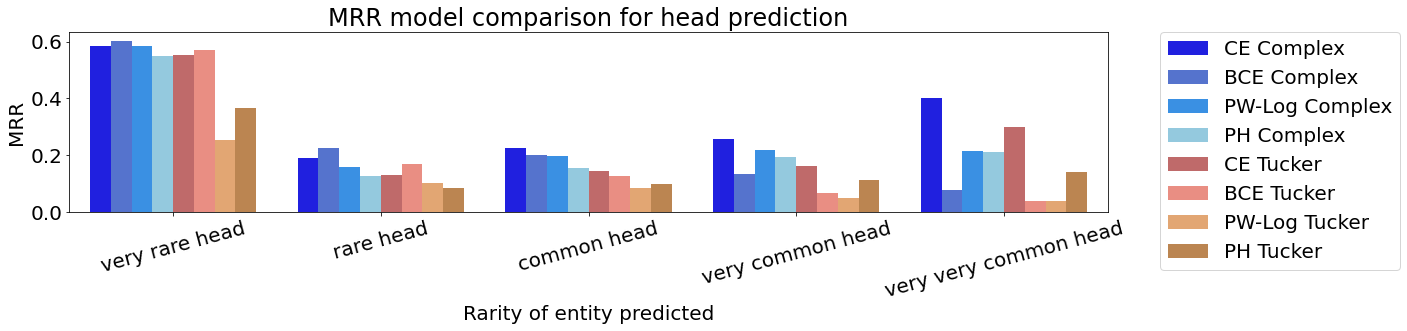

In [138]:
plot_entity_common(df, [], mrr=True, save='head_pred_all')

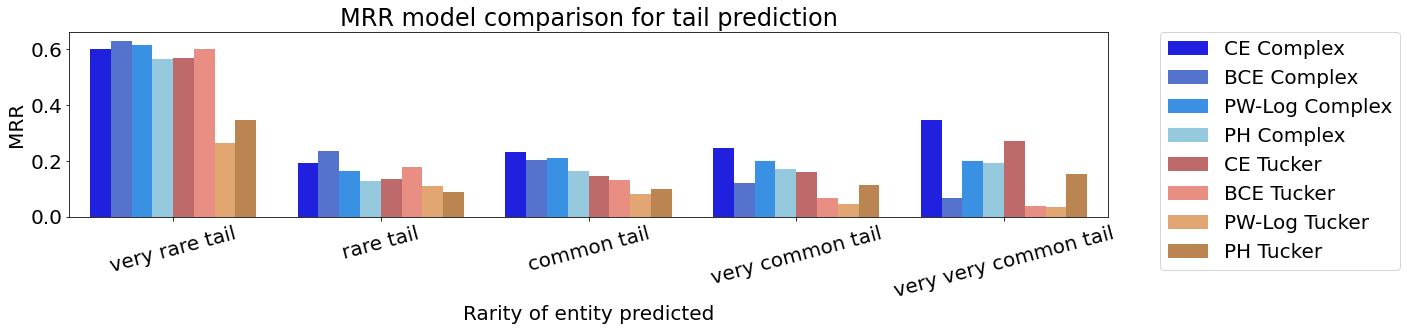

In [140]:
plot_entity_common(df, [], what='tail', mrr=True, save='tail_pred_all')

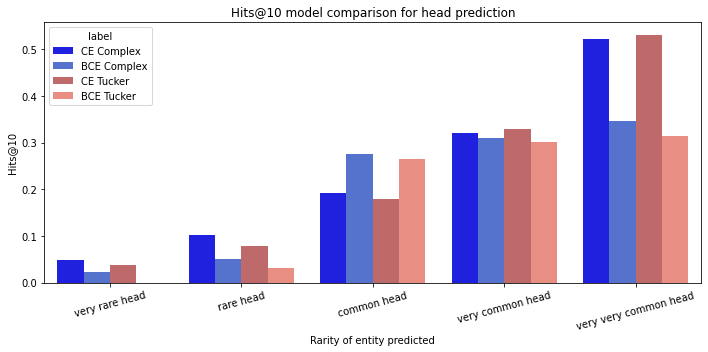

In [139]:
plot_entity_common(df, [], mrr=False, save='head_deep_comparison_pse')

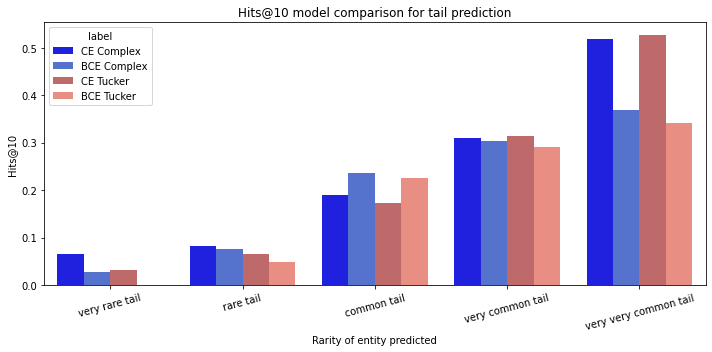

In [140]:
plot_entity_common(df, [], what='tail', mrr=False, save='tail_deep_comparison_pse')

In [208]:
!pwd

/Users/nina/Documents/UCL/Aladdin/biolink/PSE_res_ANALYSIS
